In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from collections import Counter
import re
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 24})

In [9]:
movies = pd.read_csv('data/movies.csv')
books = pd.read_csv('data/books.csv')

(-0.68059896983597279, 2.315500833021582e-35)
(-0.11886286965535166, 0.06056929781965377)


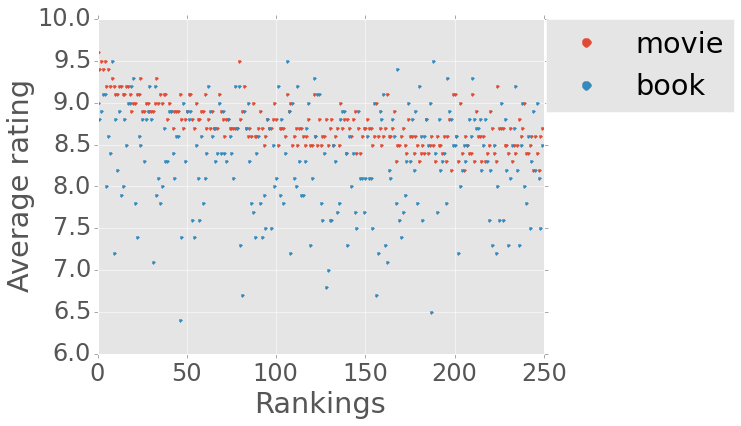

In [10]:
plt.figure(figsize=[8,6])
plt.plot(movies.ratings, '.', label='movie')
plt.plot(books.ratings, '.', label='book')
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0., numpoints=1, markerscale = 3)
plt.xlabel('Rankings')
plt.ylabel('Average rating')
print(scipy.stats.spearmanr(movies.ratings, movies['rank']))
print(scipy.stats.spearmanr(books.ratings, books['rank']))

(-0.65466557864925834, 5.594782922685401e-32)
(-0.95562424998799977, 1.2282400247547734e-133)


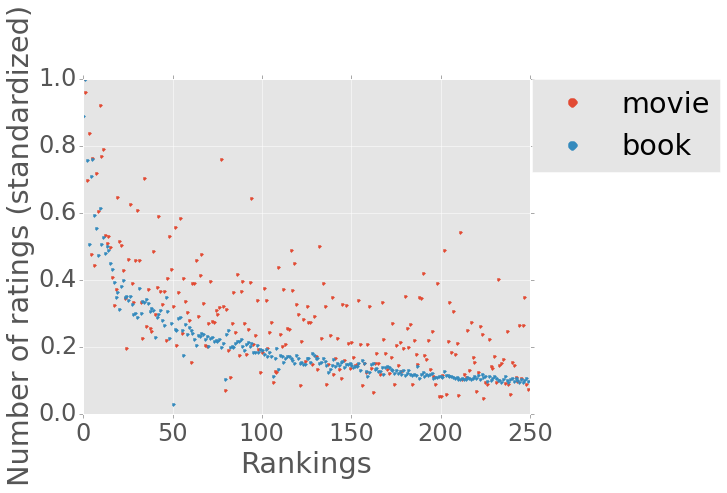

In [11]:
plt.figure(figsize=[8,6])
plt.plot(movies.rating_num/(1.0*movies.rating_num.max()), '.', label='movie')
plt.plot(books.rating_num/(1.0*books.rating_num.max()), '.', label='book')
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0., numpoints=1, markerscale = 3)
plt.xlabel('Rankings')
plt.ylabel('Number of ratings (standardized)')
print(scipy.stats.spearmanr(movies.rating_num, movies['rank']))
print(scipy.stats.spearmanr(books.rating_num, books['rank']))


(0.081225473929953426, 0.20055667182316997)
(-0.060418827671012983, 0.34140772930573404)


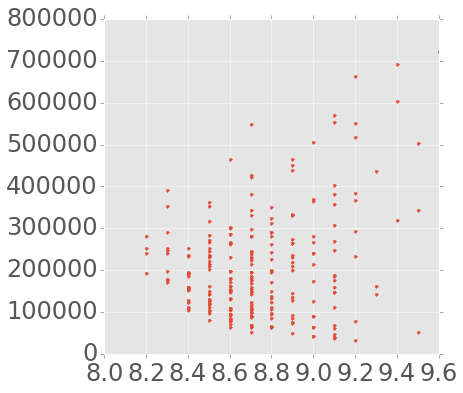

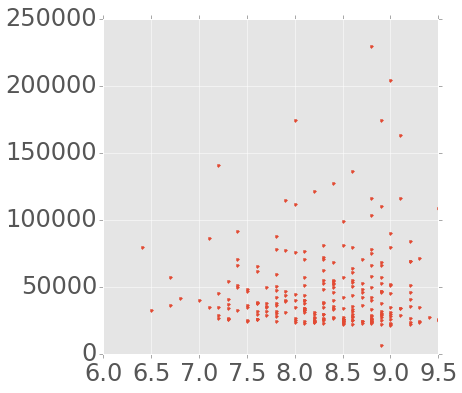

In [12]:
plt.figure(figsize=[6,6])
plt.plot(movies.ratings, movies.rating_num, '.')
print(scipy.stats.spearmanr(movies.ratings, movies.rating_num))

plt.figure(figsize=[6,6])
plt.plot(books.ratings, books.rating_num, '.')
print(scipy.stats.spearmanr(books.ratings, books.rating_num))

0.191919191919 0.900346565545
0.868686868687 0.972899918399


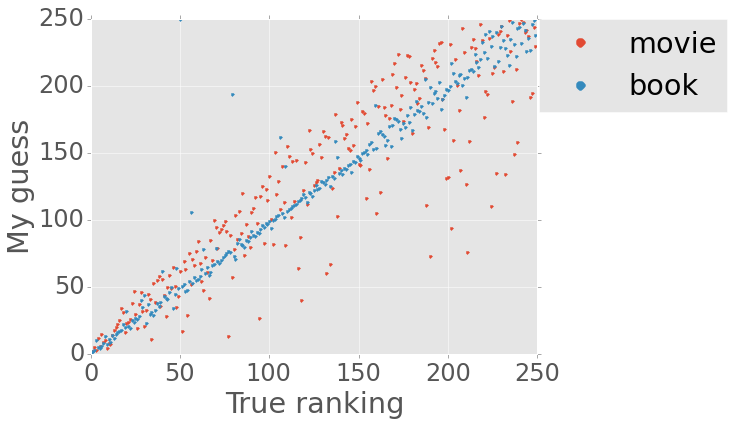

In [15]:
def find_best_linear(df):
    max_corr = 0
    arg_max_b = -1
    best_sim_rating = None
    for b in np.linspace(0,1,100):
        sim_rating = (1-b) * df.ratings*1.0/df.ratings.max() + b * df.rating_num*1.0/df.rating_num.max()
        corr = scipy.stats.spearmanr(sim_rating, df['rank'])
        if -corr[0] > max_corr:
            arg_max_b = b
            max_corr = -corr[0]
            best_sim_rating = sim_rating
    return (best_sim_rating, arg_max_b, max_corr)


plt.figure(figsize=[8,6])

best_sim_rating, arg_max_b, max_corr = find_best_linear(movies)
plt.plot(best_sim_rating.rank(ascending=False),'.', label='movie')
print(arg_max_b, max_corr)

best_sim_rating, arg_max_b, max_corr = find_best_linear(books)
plt.plot(best_sim_rating.rank(ascending=False), '.', label='book')
print(arg_max_b, max_corr)


leg=plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0., numpoints=1, markerscale = 3)
plt.xlabel('True ranking')

plt.ylabel('My guess')

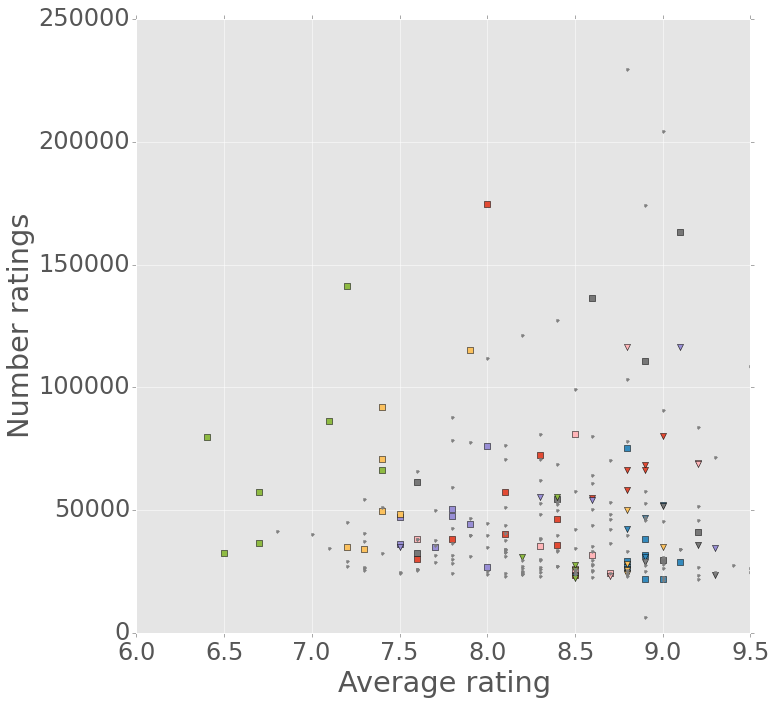

In [18]:
def get_author(meta):
    s = meta.split(' / ')[0]
    s = re.sub(r'(\[.*\])|(（.*）)|(\(.*\))|(〔.*\〕)|(\s*)','',s)
    return s


authors = books.meta.apply(get_author)
author_counter = Counter(authors)
author_counter.most_common()

plt.figure(figsize=[11, 11])
styles = ['s','v','d']
color_num = 7
books['mask'] = False
for i, (author, count) in enumerate(author_counter.most_common()):
    if count <= 3:
        break
    df = books[authors==author]
    books['mask'] = books['mask'] | (authors == author)
    plt.plot(df.ratings, df.rating_num, styles[i//color_num], label='{0}:{1}books'.format(author, count))

plt.plot(books[~books['mask']].ratings, books[~books['mask']].rating_num, '.', color = 'grey', label='others')
plt.xlabel('Average rating')
plt.ylabel('Number ratings')
